In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_load = "../matplotlib/city_data.csv"
ride_data_load = "../matplotlib/ride_data.csv"

In [61]:
cityData = pd.read_csv(city_data_load)
rideData = pd.read_csv(ride_data_load)
totalData = pd.merge(cityData, rideData, on="city", how="outer")
print(totalData.head(10))
print(cityData)

          city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850
5  Richardfort            38  Urban  2018-04-21 03:44:04   9.54  3698147103219
6  Richardfort            38  Urban  2018-02-03 00:14:26  29.04  4982665519010
7  Richardfort            38  Urban  2018-02-08 15:50:12  16.55  2270463070874
8  Richardfort            38  Urban  2018-04-03 15:07:34  40.77  9496210735824
9  Richardfort            38  Urban  2018-02-19 14:09:20  27.11  8690324801449
                     city  driver_count      type
0             Richardfort            38     Urban
1            Williamsstad      

In [31]:
cityType = totalData["type"].value_counts()
print(cityType)

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64


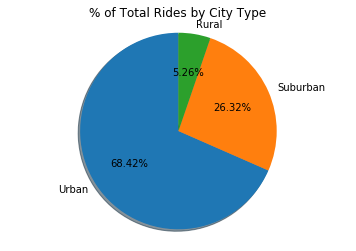

In [32]:
plt.pie(cityType, labels = cityType.keys(), startangle = 90, shadow = True, autopct ="%1.2f%%")
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

In [33]:
citytypeFares = totalData.groupby("type").sum()
print(citytypeFares["fare"])

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


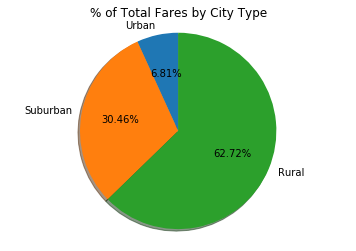

In [34]:
plt.pie(citytypeFares["fare"], labels = cityType.keys(), startangle = 90, shadow = True, autopct ="%1.2f%%" )
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

In [35]:
citytypeFares['driver_count'].value_counts()

8570     1
537      1
59602    1
Name: driver_count, dtype: int64

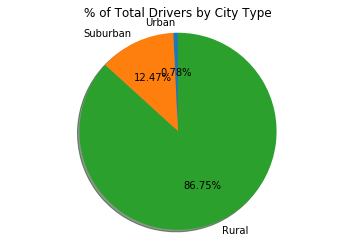

In [36]:
plt.pie(citytypeFares["driver_count"], labels = cityType.keys(), startangle = 90, shadow = True, autopct ="%1.2f%%" )
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

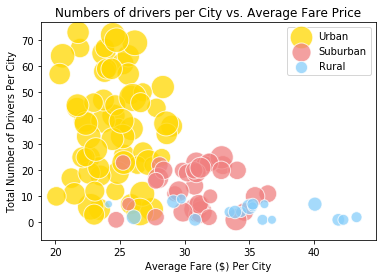

In [103]:
city_mean = totalData.groupby("city")["fare"].mean()
city_driver = totalData.groupby("city")["driver_count"].mean()
city_ride = totalData.groupby("city")["ride_id"].count()
city_df = cityData.set_index("city")
city_col = city_df.drop(columns = "driver_count")

bubble_data = pd.DataFrame({"Average Fare ($) Per City": city_mean,
               "Total Number of Drivers Per City": city_driver,
               "Total Numbers of Rides": city_ride,
               "Type": city_col["type"]
              })

urban_bubble = bubble_data.loc[bubble_data["Type"]== "Urban"]
sub_bubble = bubble_data.loc[bubble_data["Type"]== "Suburban"] 
rural_bubble = bubble_data.loc[bubble_data["Type"]== "Rural"]
bub_list = [urban_bubble, sub_bubble, rural_bubble]

plt.scatter(urban_bubble["Average Fare ($) Per City"],urban_bubble["Total Number of Drivers Per City"], s=urban_bubble["Total Numbers of Rides"]*20, color = "gold", alpha = .75, edgecolor='w', label = "Urban")
plt.scatter(sub_bubble["Average Fare ($) Per City"],sub_bubble["Total Number of Drivers Per City"], s=sub_bubble["Total Numbers of Rides"]*20, color = "lightcoral", alpha = .75, edgecolor='w', label = "Suburban")
plt.scatter(rural_bubble["Average Fare ($) Per City"],rural_bubble["Total Number of Drivers Per City"], s=rural_bubble["Total Numbers of Rides"]*20, color = "lightskyblue", alpha = .75, edgecolor='w', label = "Rural")
plt.xlabel("Average Fare ($) Per City") 
plt.ylabel("Total Number of Drivers Per City")
plt.legend(loc = "upper right")
plt.title("Numbers of drivers per City vs. Average Fare Price")
plt.show()
